# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [34]:
%load_ext watermark
%watermark -a 'Marc Tagne' -u -d -v -p numpy,pandas,matplotlib,sklearn,seaborn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Marc Tagne 
last updated: 2017-01-28 

CPython 2.7.12
IPython 5.1.0

numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.3
sklearn 0.17.1
seaborn 0.7.1


In [35]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)
data.head()

Boston housing dataset has 489 data points with 4 variables each.


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [36]:
type(prices)

pandas.core.series.Series

In [37]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

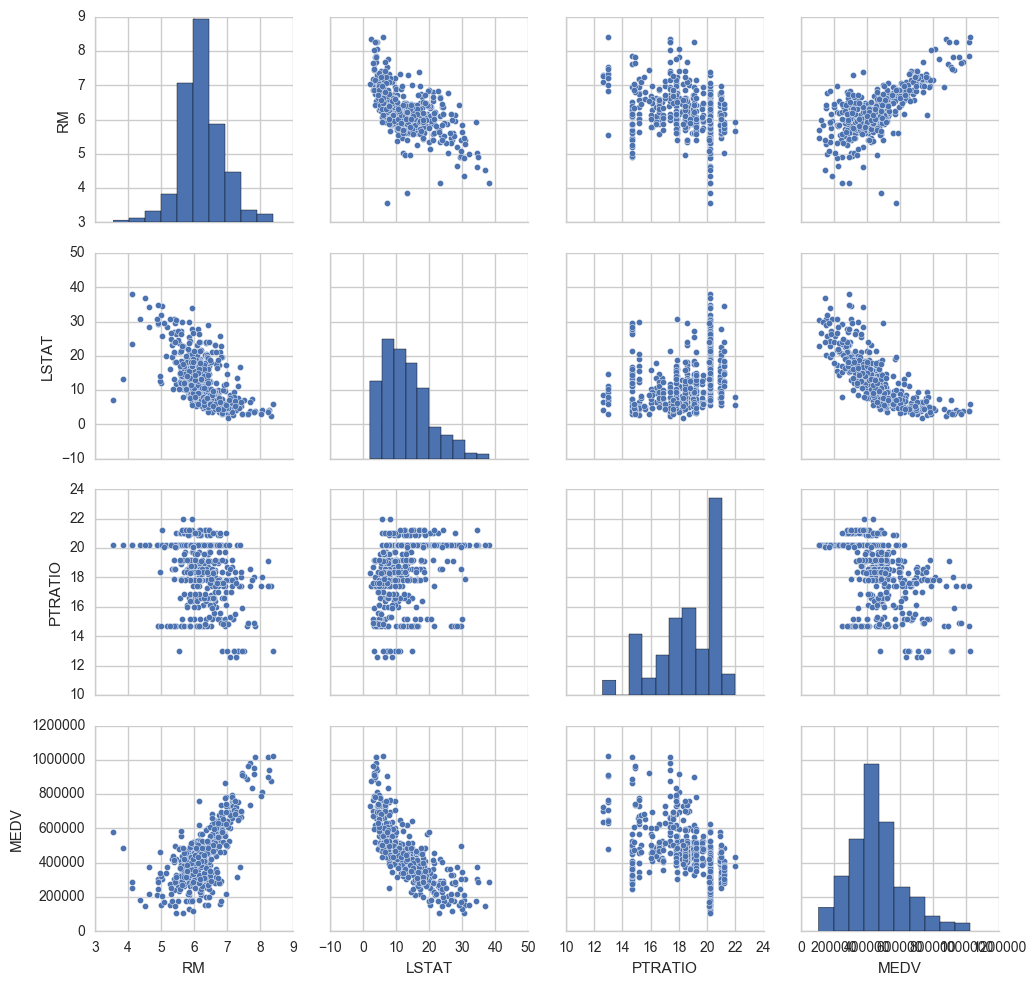

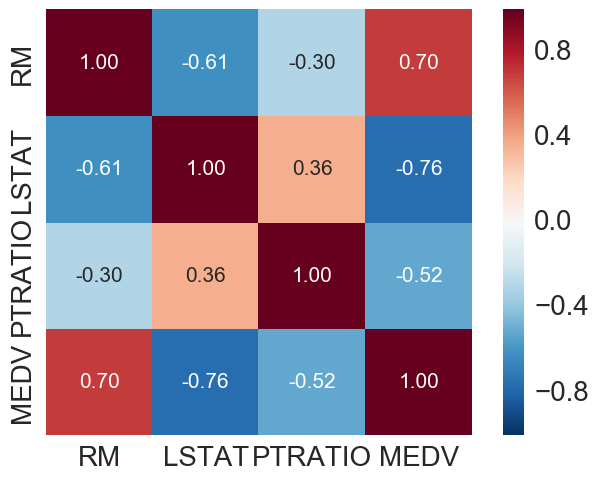

In [38]:
# Plot scatterplot matrix using pairplot function from seaborn,
# library used to draw statiscal plots based on matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(style = 'whitegrid', context='notebook')
cols = ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
'''
 Seaborn's pairplot is used to plot scatter and histogram figures.
 this plots provide a useful summary of the relationhsip between features of interest:
 'RM', 'LSTAT', 'PTRATIO' and 'MEDV'.
'''
sns.pairplot(data[cols], 
             size=2.5)
plt.show()
'''
Numpy's corrcoef will be used compute the The correlation coefficient matrix of the features :
'RM', 'LSTAT', 'PTRATIO' and 'MEDV. Seaborn's heatmap will be used to plot the correlation matrix 
 as  a heatmap
'''
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=2)
sns.heatmap(cm, 
            cbar=True, 
            annot=True, 
            square=True, 
            fmt='.2f', 
            annot_kws={'size':15},
            yticklabels=cols,
            xticklabels=cols
            )
plt.show()

(array([ 19.,  49.,  55.,  50.,  56.,  40.,  45.,  39.,  40.,  22.,  17.,
         11.,  12.,   9.,   6.,  10.,   3.,   2.,   2.,   2.]),
 array([  1.98  ,   3.7795,   5.579 ,   7.3785,   9.178 ,  10.9775,
         12.777 ,  14.5765,  16.376 ,  18.1755,  19.975 ,  21.7745,
         23.574 ,  25.3735,  27.173 ,  28.9725,  30.772 ,  32.5715,
         34.371 ,  36.1705,  37.97  ]),
 <a list of 20 Patch objects>)

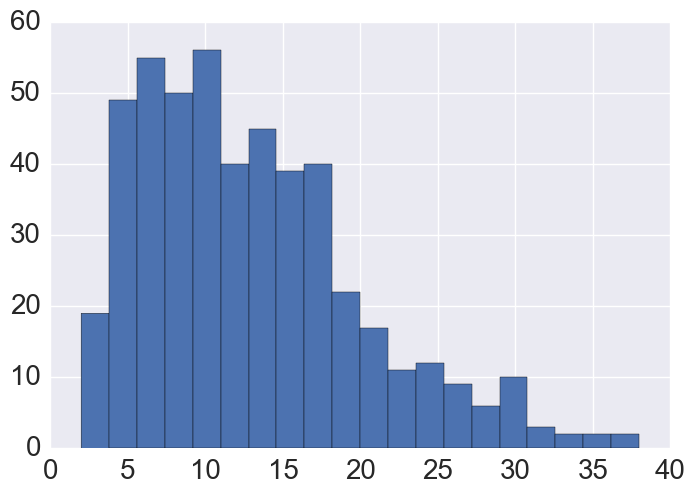

In [39]:
plt.hist(data.LSTAT, bins = 20)

(array([  1.,   1.,   4.,  10.,  10.,  17.,  24.,  25.,  35.,  35.,  40.,
         41.,  49.,  45.,  56.,  30.,  29.,  16.,  15.,   6.]),
 array([ 0.68309684,  0.83078182,  0.9784668 ,  1.12615177,  1.27383675,
         1.42152173,  1.5692067 ,  1.71689168,  1.86457666,  2.01226163,
         2.15994661,  2.30763159,  2.45531656,  2.60300154,  2.75068652,
         2.89837149,  3.04605647,  3.19374144,  3.34142642,  3.4891114 ,
         3.63679637]),
 <a list of 20 Patch objects>)

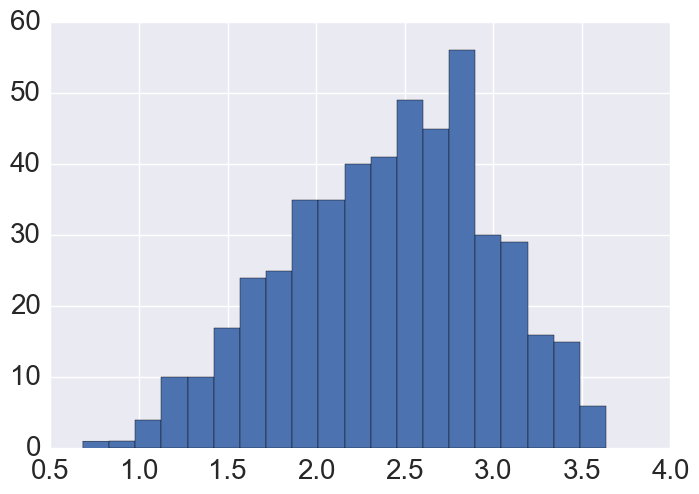

In [40]:
plt.hist(np.log(data.LSTAT), bins = 20)

**Answer: **
_The scatter plots above show a 'linear' relationship between `'RM'` and `'MEDV'`. The correlation matrix confirm this finding. There is a positive correlation between `'RM'` and `'MEDV'`. Thus, I expect `'MEDV'` will increase if  `'RM'` increases.E.g. A 7 bedrooms' home will be worth more than a 6 bedrooms' home_

_On the other hand, the scatter plots show a higher (albeit, negative) correlation between `'LSTAT'` and `'MEDV'` parameters. This relationship does not appear to be linear. However, based on the plot we can posit that a higher `'LSTAT'` will lead to a lower `'MEDV'`. Example, a 6 bedrooms home will sell at a lower price in a area with a higher `'LSTAT'`. The same type of home could sell at a higher price in an area with lower poverty level._

_Finally, based on the plots and the correlation matrix, it's difficult to characterize the relationship between `'PTRATIO'` and `'MEDV'`. However, the negative correlation appears to indicate that a lower `'PTRATIO'` will have a non-negligible impact on `'MEDV'`. Example, a 6 bedrooms home located in a lower `'PTRATIO'` school district will be worth more than a similar 6 bedrooms home locate in a school district with a higher `'PTRATIO'` _


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [41]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score 

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [42]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer: `'0.923'`**
with R^2 of 0.923 percent, this model can capture 92.3 percent of the variation of the  of the target variable. 
In this simple example, we can observe that the model sucessfully capture the variation of the target variable due to high R^2 score (close to 1). This means the prediction of the target variable can be done with minimum error level. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [43]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)
# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer:**
_The main benefit of splitting a dataset into some ratio of training and testing subsets for a learning algorithm is to provide a mean to independently test the learning model created from the training subset. The training set is used to train, and calibrate the model. The test set, or holdout set,  provides an independent mean of measuring the level of errors for the purpose of generalization on a calibrated model_. 

_In an ideal data rich situation, one suggested approach will to split the data in 3 parts : a training set, a validation set and a test set. The training set will be used to fit the models; the validation set will be used to estimate the prediction error to select the right model; The test set is used for assessment of the generalization error of the selected mode_.

_Unfortunately most situation are not ideal, thus the split in two parts : a training set and a testing set_. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

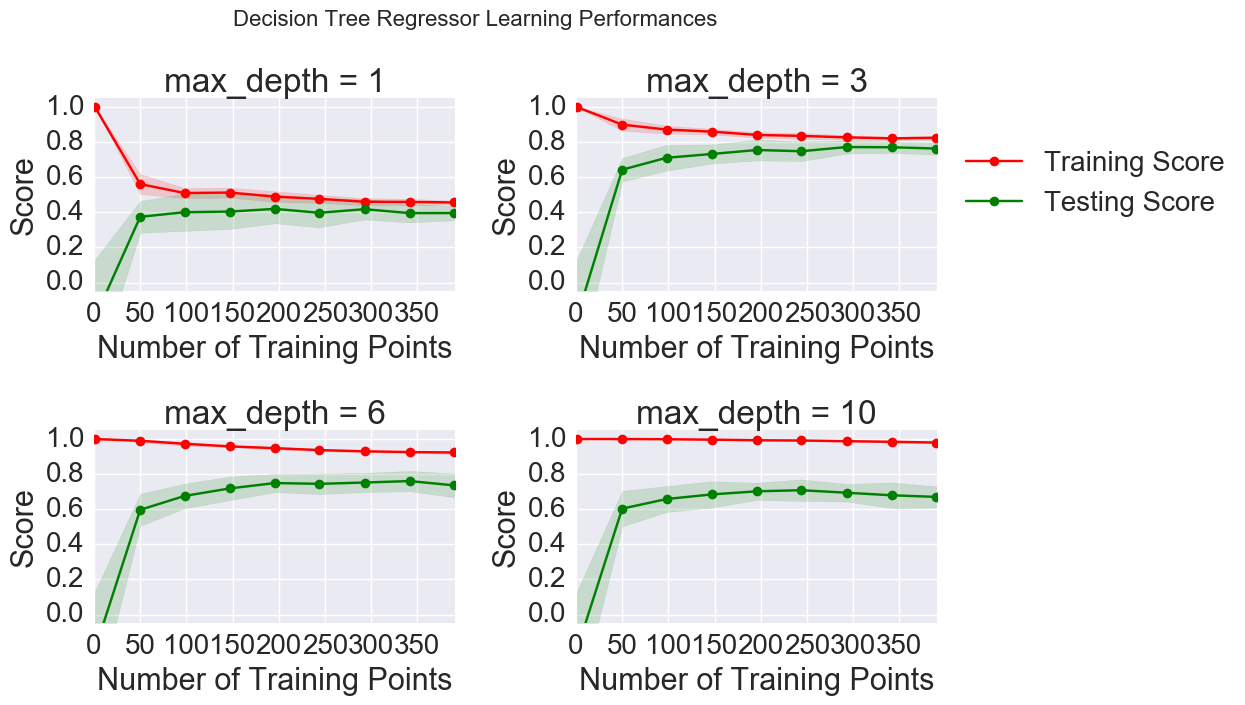

In [44]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

_In the graph with **maximum depth of 3**, the training and test score converge toward 0.8. The score will likely not improve if more training points were added. Since the testing and training points converge and stabilize toward the score of .8 around points 350, the testing curve will not improve.  
I don't think that more training points would benefit the model because the model already converge._



### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

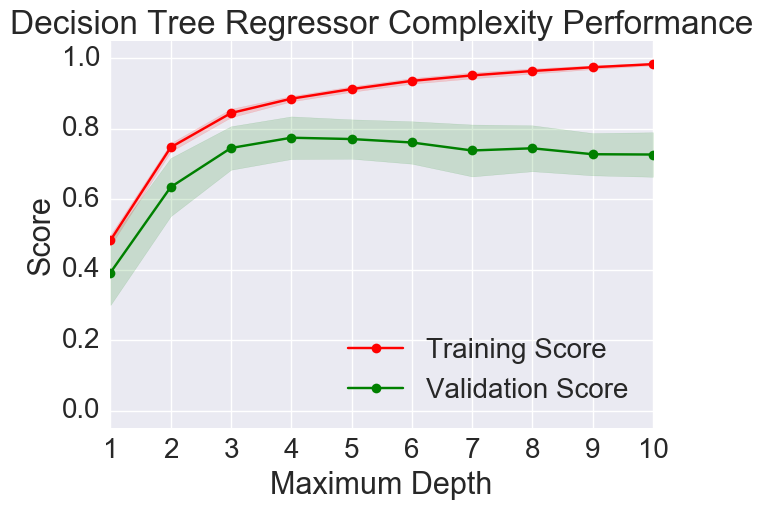

In [45]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
 
_The model with a **maximum depth of 1**_ _suffers from high bias, which is indicated by both a low training(R^2 ~ 0.5) and testing score (R^2 ~ 0.4), which indicates that it likely underfits the training data_.

_The model with a **maximum depth of 10**_ _suffers from high variance, which is indicated the the large gap between the  training(R^2 ~ 1) and testing score(R^2 ~ 0.7)_.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **
_maximum depth of 4 will generalize well for unseen data, 4 (validation score maxima) is the maximum depth of the validation score on the decision tree Regressor Complexity Performance plot._

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **
_A machine learning model development go through an iterative process that covers generally 3 steps : Training, tuning and evaluation. As mentioned previously, a training set is used for the model training step and a test set will estimate the performance of the model. A typical machine learning application will aslo need to be tuned or optimized. A tuning is done by comparing different parameters settings to further improve the performance for making prediction on useen data. This tuning guides the choice of the selection of the appropriate model. The parameters to be tuned or optimized are called hyperparameter of a model.For example, the regularization parameter in logistic regression or the depth parameter of a decision tree_. 


_The grid search is a hyperparmeter optimization technique that is used to help improve the performance of a model by finding the optimal combination of hyperparameter values. The grid search uses a brute-force exhaustive search paradigm. Based on a list of specified values for different hyperparameters, the computer evaluates the model performance for each combination of those to obtain the optimal set_.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
_The  k-fold cross-validation is a training technique  that randomly splits the training dataset into k folds without replacement, where(k-1) folds are used for the model training and one fold is used for testing. This procedure is repeated k times so that we obtain k models and performance estimates. Since k-fold cross-validation is a resampling technique without replacement it takes into account variance in the training set. The main idea here is that each sample in the training set has the opportunity of being tested (or evaluated) at least once_.

_The estimate generalization performance of the machine learning model is carried out using the average of  k performance estimates. A  cross-validated data set provides an accurate measure of a model prediction error with the following benefits _ : 

_1) Minimization of the risk of  over-fitting or under-fitting the training set_ 

_2) The best model prediction error to be used as performance metric to guide the optimization of hyperparameters using grid search algorithm _.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_iter'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [46]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(estimator=regressor, 
                        param_grid=params, 
                        scoring=scoring_fnc, 
                        cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [47]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **
_Parameter `'max_depth'` is 4 for the optimal model. This result matches my guess is **Question 6**_.

In [48]:
zip(X_train.columns, reg.feature_importances_)

[('RM', 0.28001999778529074),
 ('LSTAT', 0.68555687739405591),
 ('PTRATIO', 0.034423124820653239)]

In [49]:
reg.score(X_test, y_test)

0.77313358571301971

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [50]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
features.describe()

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


,RM,LSTAT,PTRATIO
count,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564
std,0.643650,7.081990,2.111268
min,3.561000,1.980000,12.600000
25%,5.880000,7.370000,17.400000
50%,6.185000,11.690000,19.100000
75%,6.575000,17.120000,20.200000
max,8.398000,37.970000,22.000000


**Answer: **

Predicted selling price for Client 1's home: $391,183.33
 
Predicted selling price for Client 2's home: $189,123.53

Predicted selling price for Client 3's home: $942,666.67

The results appear reasonable given the value of the respective features. Based on  **Question 1** **Data exploration** results, there is positive correlation between the number of rooms in a home and its predicted selling price. As the model confirmed, an 8 rooms home commands a higher price than a 4 or 5 rooms home. Futhermore, as shown by the '`five-number summary`', **client 3** number of rooms is well above the average number of room (almost 3 standards deviation above the mean, thus in the 1 percent). 

The model also confirms, as shown by **Data Exploration**,  there is negative correlation between the neighborhood poverty level and the home selling price. This could justify why ** client 2** home  commands such a low price and **client 3** home will sell at a premium. 
The neighborhood poverty level for **client 3** home is way below the average (close to the minimimum value) whereas it's almost triple the average for **client 2** (close to the maximum).  **client 1** predicted selling price appears to affected by the relatively higher neighborhood poverty level (above the average). See statistics summary for more details


It's important to note that **client 3** premium home price is influenced by a combination of  a higher number of rooms (above the average), the relatively low neighborhood poverty level (close to the minimum) and a low student-teacher ratio of nearby schools(close to the minimum). By the same token,  ** client 2** low selling price appears to be due the triple effects of a a lower number of rooms (below the average), a higher student-teacher ratio (close to the maximum) and neighborhood poverty level(close to the maximum) . See statistics summary for more details.   

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [51]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
_The model constructed has a few limitations. However, I think it can be used in a real-world settings with a few tuning to address its limitations. following are some elements that can be used to highlight the constructed model shortcoming_.

_As the housing crisis of 2008 showed, housing prices are subject to the economic environment context. To illustrate the shortcoming of this model I will focus on only 3 economic factors namely inflation, local economic context and economic policies. Housing price inflation or deflation is affected by the boom and bust of the economic cycle. Hence data collected in 1978 might not be relevant today, as we have gone through many economic cycles since then. The local economy influences housing price. As the saying goes, real state is local. Boston has experienced different economic realities  since 1978 compared to a city such as  Detroit. Finally, according to many economists, banking  policies played an non-negligible role in the housing 'crisis of 2008. Hence, the model might not be robust enough to make consistent prediction_.  

_Another important element missing from the features is the type of house.. A mountain cabin in Tahoe area cannot be compared to a beach cabin in Capitola_.

_Howerver, adding more features must be done with caution :  if the features do not have a meaningful relationship with the target variable, it may be harder for the model to approximate a valid function to predict the latter. Worse, a spurious correlation may lead the model to build a function that works well for the training data but will have no use in the real world - which could lead to overfitting_. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

One of the biggest advantages when using a decision tree as a classifier in the interpretability of the model. Therefore we can actually visualize this exact tree with the use of [export_graphviz][2]
[2]: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

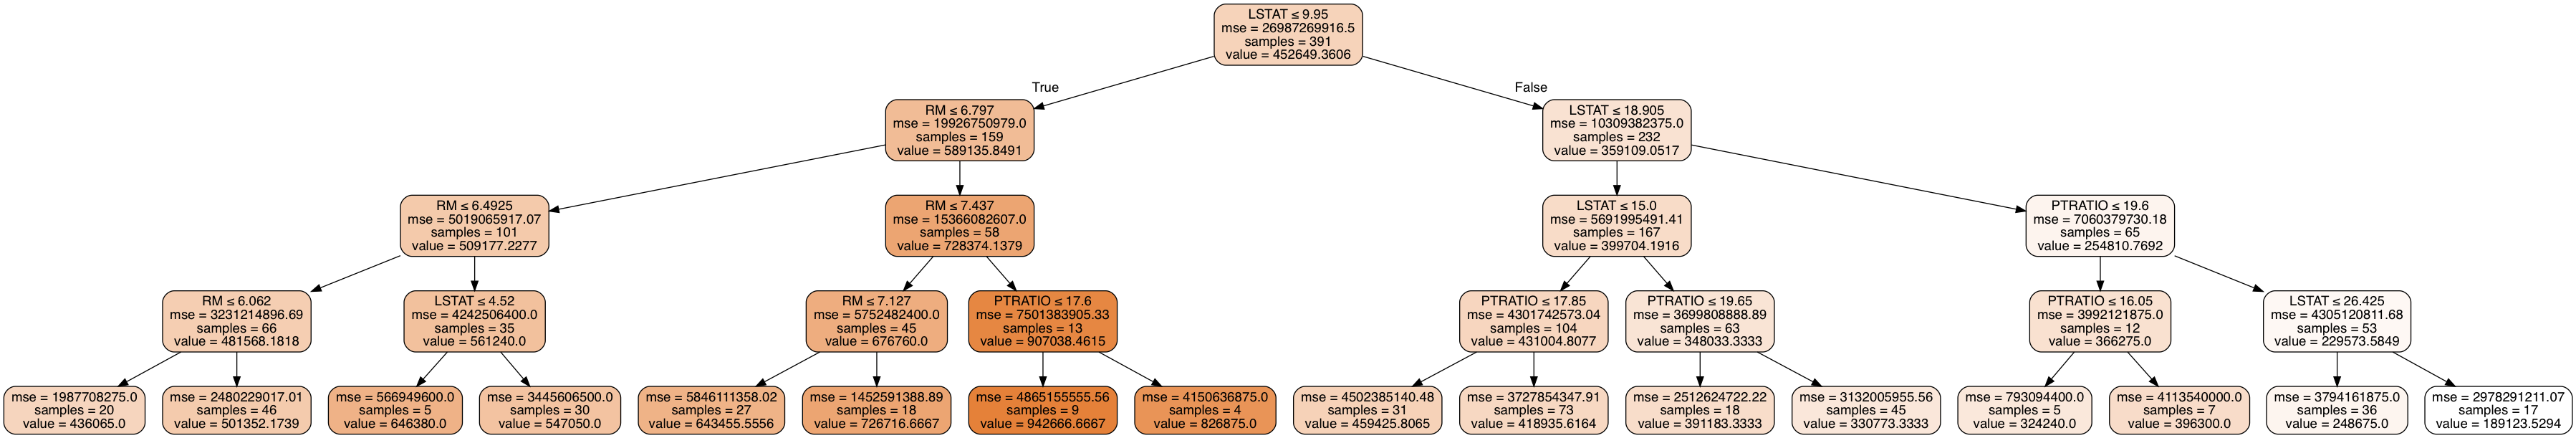

In [54]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydot
from sklearn import tree

clf = DecisionTreeRegressor(max_depth=4)
clf = clf.fit(X_train, y_train)
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=X_train.columns,
                     class_names="PRICES",
                     filled=True, rounded=True,
                     special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

** Feedback From Reviewer - Suggestion**

You have all the right ideas here. To go into a bit more detail here, I would say that k-fold cross-validation with 5 splits is described as the following:

* The data is split into k folds, (cv = 5)
* We train a model on the k-1 folds, k times, and use the remaining fold as the validation set (4 for train and 1 for validation here)
* For each model we calculate the validation error (5 errors rates here)
* Then at the end, all of the error rates are averaged together. (single number)

If you would like a visual of this, this video does a great job. [Check this one out][1].

And you have the right ideas in terms of the benefits with gridSearch. This is an extremely important concept in machine learning, as this allows for multiple testing datasets and is not just reliant on the particular subset of partitioned data. For example, if we use single validation set and perform grid search then it is the chance that we just select the best parameters for that specific validation set. But using k-fold we perform grid search on various validation set so we select best parameter for generalize case. Thus cross-validation better estimates the volatility by giving you the average error rate and will better represent generalization error.

If you would like a full run example, run this code based on the iris data set in your python shell or something and examine the print statements, as this is a great example
[1]:https://www.youtube.com/watch?v=hihuMBCuSlU

In [33]:
import numpy as np
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()

# Split the iris data into train/test data sets with 30% reserved for testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# Build an SVC model for predicting iris classifications using training data
clf = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train, y_train)

# Now measure its performance with the test data with single subset
print clf.score(X_test, y_test) 

# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_validation.cross_val_score(clf, iris.data, iris.target, cv=5)

# Print the accuracy for each fold:
print scores

# And the mean accuracy of all 5 folds:
print scores.mean()

0.977777777778
[ 0.96666667  1.          0.96666667  0.96666667  1.        ]
0.98
